<a href="https://colab.research.google.com/github/nlee0212/TFCertificatePrep/blob/main/TF_Certificate_Image_Classification_rps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 3

Convolution Neural Network (합성곱 신경망)를 활용한 이미지 분류 (Image Classification)

## 확인

1. GPU 옵션 켜져 있는지 확인할 것!!! (수정 - 노트설정 - 하드웨어설정 (GPU))

## 순서

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

## 문제

For this task you will build a classifier for Rock-Paper-Scissors 
based on the rps dataset.

IMPORTANT: Your final layer should be as shown, do not change the
provided code, or the tests may fail

IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
So ensure that your input layer is designed accordingly, or the tests
may fail. 

NOTE THAT THIS IS UNLABELLED DATA. 
You can use the ImageDataGenerator to automatically label it
and we have provided some starter code.

-------------------------------

이 작업에서는 Rock-Paper-Scissors에 대한 분류기를 작성합니다.
rps 데이터 셋을 기반으로합니다.

중요 : 최종 레이어는 그림과 같아야합니다.

중요 : 이미지는 3 바이트 150x150의 컬러사진으로 테스트됩니다.
따라서 입력 레이어가 그에 따라 설계되었거나 테스트되었는지 확인하십시오.

ImageDataGenerator를 사용하여 자동으로 레이블을 지정할 수 있습니다.

-----------------------------------


# 실습

## STEP 1. import 

In [ ]:
import urllib.request
import zipfile
import numpy as np
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

## STEP 1. Load Dataset

가위바위보에 대한 손의 사진을 가지고 `가위`인지, `바위`인지, `보자기`인지 분류하는 `classification` 문제입니다.

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

## STEP 2. 전처리 (ImageDataGenerator)

데이터셋의 경로를 지정해 주세요 (root 폴더의 경로를 지정하여야 합니다.)


[코드]

In [ ]:
TRAINING_DIR = "tmp/rps/"

`ImageDataGenerator`를 정의합니다.

다음의 옵션 값들로 Image Aumentation(이미지 변형) 옵션을 적절히 조절해 주세요

* `rescale`: 이미지의 픽셀 값을 조정
* `rotation_range`: 이미지 회전
* `width_shift_range`: 가로 방향으로 이동
* `height_shift_range`: 세로 방향으로 이동
* `shear_range`: 이미지 굴절
* `zoom_range`: 이미지 확대
* `horizontal_flip`: 횡 방향으로 이미지 반전
* `fill_mode`: 이미지를 이동이나 굴절시켰을 때 빈 픽셀 값에 대하여 값을 채우는 방식
* `validation_split`: validation set의 구성 비율

[코드]

In [ ]:
training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    # 위의 옵션 값들을 보고 적절히 대입하여 줍니다.
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
    )


ImageDataGenerator를 잘 만들어 주었다면, `flow_from_directory`로 이미지를 어떻게 공급해 줄 것인가를 지정해 주어야합니다.

* train / validation set 전용 generator를 별도로 정의합니다.
* `batch_size`를 정의합니다 (128)
* `target_size`를 정의합니다. (150 x 150). 이미지를 알아서 타겟 사이즈 만큼 잘라내어 공급합니다.
* `class_mode`는 3개 이상의 클래스인 경우 'categorical' 이진 분류의 경우 `binary`를 지정합니다.
* `subset`을 지정합니다. (training / validation)


**training_generator**에 대한 `from_from_directory`를 정의합니다.

* 2016 개의 이미지가 출력되어야 합니다.

[코드]

In [ ]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR, 
                                                          batch_size = 128,
                                                          target_size = (150,150),
                                                          class_mode='categorical',
                                                          subset='training',
                                                         )

Found 2016 images belonging to 3 classes.


**validation_generator**에 대한 `from_from_directory`를 정의합니다.

* 504 개의 이미지가 출력되어야 합니다.

[코드]

In [ ]:
validation_generator = training_datagen.flow_from_directory(TRAINING_DIR, 
                                                            batch_size = 128,
                                                            target_size = (150,150),
                                                            class_mode='categorical',
                                                            subset='validation', 
                                                            )

Found 504 images belonging to 3 classes.


오리지널 사진 파일
Found 2520 images belonging to 3 classes.
(128, 150, 150, 3) (128, 3)
[1. 0. 0.]


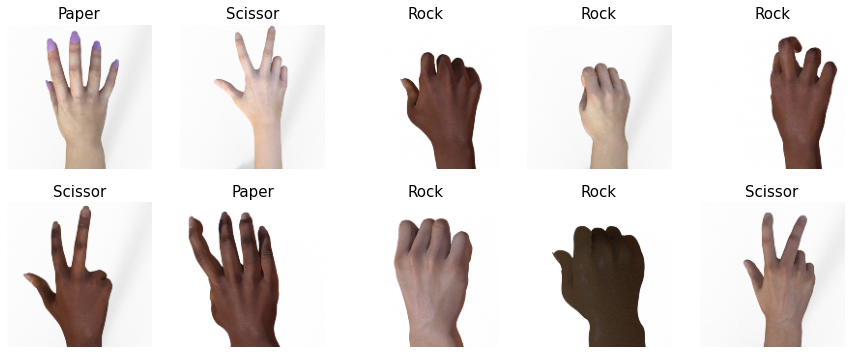

Augmentation 적용한 사진 파일
(128, 150, 150, 3) (128, 3)
[0. 0. 1.]


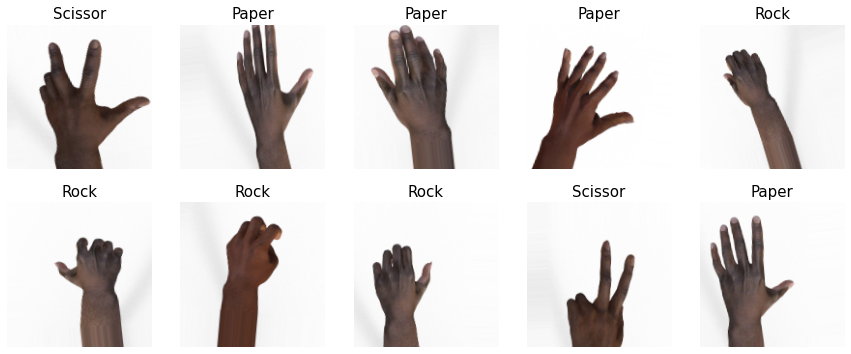

In [ ]:
import matplotlib.pyplot as plt

class_map = {
    0: "Paper",
    1: "Rock",
    2: "Scissor"
}

print('오리지널 사진 파일')

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150,150),
                                                          class_mode = 'categorical')

for x, y in original_generator:
  print(x.shape, y.shape)
  print(y[0])

  fig, axes = plt.subplots(2,5)
  fig.set_size_inches(15,6)
  for i in range(10):
    axes[i//5,i%5].imshow(x[i])
    axes[i//5,i%5].set_title(class_map[y[i].argmax()],fontsize=15)
    axes[i//5,i%5].axis('off')
  plt.show()
  break

print('Augmentation 적용한 사진 파일')

for x, y in training_generator:
  print(x.shape, y.shape)
  print(y[0])

  fig, axes = plt.subplots(2,5)
  fig.set_size_inches(15,6)
  for i in range(10):
    axes[i//5,i%5].imshow(x[i])
    axes[i//5,i%5].set_title(class_map[y[i].argmax()],fontsize=15)
    axes[i//5,i%5].axis('off')
  plt.show()
  break

## STEP 3. 모델 정의 (Sequential)

In [ ]:
model = Sequential([
    # Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (150, 150, 3)으로 지정합니다.
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    # 2D -> 1D로 변환을 위하여 Flatten 합니다.
    Flatten(),
    # 과적합 방지를 위하여 Dropout을 적용합니다.
    Dropout(0.5),
    # Dense
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    # Classification을 위한 Softmax 
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰줍니다 (3개), activation도 잊지마세요!
    Dense(3,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

## STEP 4. 컴파일 (compile)

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`는 무엇을 지정하면 좋을까요? (`categorical_crossentropy` / `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
    )

# ImageDataGenerator는 자동으로 label을 원핫인코딩으로 해줌 => categorical_crossentropy 사용해도 됨

## STEP 5. ModelCheckpoint

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

[코드]

In [ ]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True)

## STEP 6. 학습 (fit)

In [ ]:
history = model.fit(training_generator,
          validation_data=(validation_generator),
          epochs=25,
          callbacks=[checkpoint]
          )

Epoch 1/25
16/16 [==============================] - 23s 1s/step - loss: 1.1032 - acc: 0.3437 - val_loss: 1.0972 - val_acc: 0.3333

Epoch 00001: val_loss improved from inf to 1.09721, saving model to my_checkpoint.ckpt
Epoch 2/25
16/16 [==============================] - 20s 1s/step - loss: 1.0834 - acc: 0.3807 - val_loss: 1.1167 - val_acc: 0.3770

Epoch 00002: val_loss did not improve from 1.09721
Epoch 3/25
16/16 [==============================] - 20s 1s/step - loss: 0.8018 - acc: 0.5800 - val_loss: 0.8766 - val_acc: 0.6468

Epoch 00003: val_loss improved from 1.09721 to 0.87663, saving model to my_checkpoint.ckpt
Epoch 4/25
16/16 [==============================] - 20s 1s/step - loss: 0.5523 - acc: 0.7483 - val_loss: 1.2435 - val_acc: 0.4742

Epoch 00004: val_loss did not improve from 0.87663
Epoch 5/25
16/16 [==============================] - 20s 1s/step - loss: 0.3927 - acc: 0.8369 - val_loss: 0.8800 - val_acc: 0.6786

Epoch 00005: val_loss did not improve from 0.87663
Epoch 6/25
16/

## STEP 7. 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 합니다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없습니다.

[코드]

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
import matplotlib.pyplot as plt

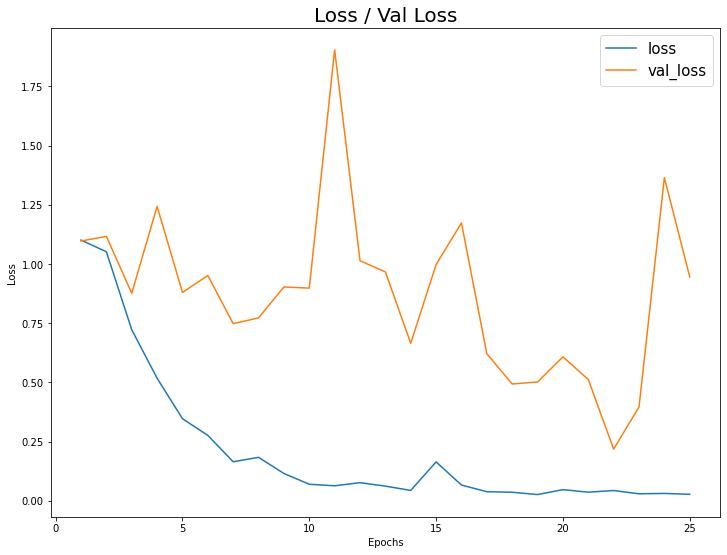

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 26), history.history['loss'])
plt.plot(np.arange(1, 26), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

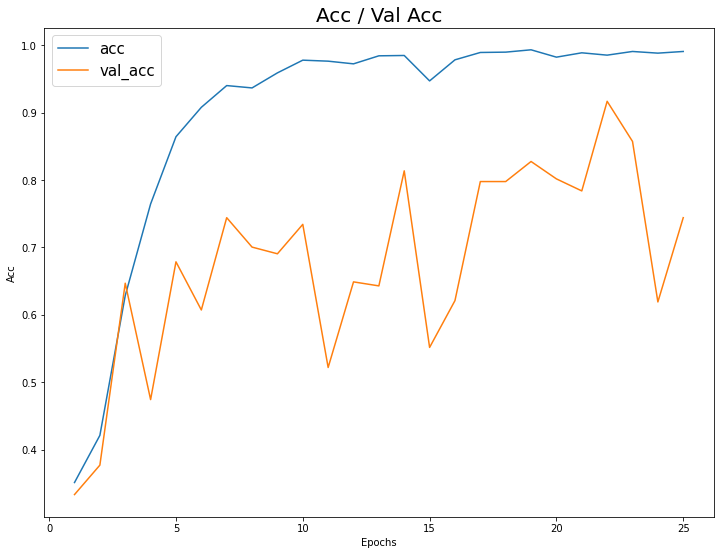

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 26), history.history['acc'])
plt.plot(np.arange(1, 26), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()